In [36]:
#! pip install gensim
#! pip install nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import re
import tqdm
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arceb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arceb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df = pd.read_csv(r'C:\Users\arceb\PycharmProjects\Projet_DSSS_2023\data_cleaned/initial_corpus.csv')
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro
1,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamb...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26 mars, les Vingt-Sept doivent se réuni...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, n’est pas s...",Monde
4,Le Monde (site web),Marc Lazar : « Plus l’Italie fait nation face ...,2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à...,date du 25 mars le plus grand nombre de morts...,t de la School of Government de la Luiss (Libr...,Monde
...,...,...,...,...,...,...,...,...
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, i...","nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
8914,La Croix,Migrants en mer Egée : «Ça a été les deux heur...,2020-04-15,NaN,"Les faits En 2015, des «?zones de transit?» av...",nt été mises en place par le pays dans les vil...,programme lancé en 2015 de répartition par Éta...,Croix
8915,Le Figaro,"Migrants: Dakhla, point de départ du grand cou...",2020-04-14,NaN,Bruxelles espère arriver à des « résultats imp...,ants » en 2021 sur la réforme de l'asile prése...,oit d'asile depuis le pays européen où ils son...,Figaro
8916,Le Figaro,Pacte migratoire?: les pays du sud sauveront-i...,2020-04-12,NaN,C'EST L'UNE des rares bonnes nouvelles de l'an...,"2020 : la pandémie, grâce au plan de relance ...",une victoire à la Pyrrhus... Et dans tous les ...,Figaro


In [14]:
#df.replace({'Ã§':'ç','Ã©': 'é', 'Ã¨': 'è', 'Ãª': 'ê', 'Ã´': 'ô','Ã': 'à'}, regex=True, inplace=True)
#df.replace({'Â': '', 'â': "'", "à\na": "ç",'à ': 'à'}, regex=True, inplace=True)
#df

,Unnamed: 0,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,crisis_term
0,1,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro,migrant_migratoire
1,2,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"àric Albert, Cécile Boutelet, Jérôme Gauthere...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde,migrant_migratoire
2,3,Le Figaro (site web),àlargissement de lâUnion européenne à lâ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement dâun...,Figaro,migrant_migratoire
3,4,Le Monde (site web),CoronavirusÂ : les trois semaines qui ont cham...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26Â mars, les Vingt-Sept doivent se réun...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, nâest pas...",Monde,migrant_migratoire
4,5,Le Monde (site web),Marc LazarÂ : Â«Â Plus lâItalie fait nation ...,2020-03-25,Marc Lazar,Tribune. LâItalie est le pays qui enregistre...,date du 25Â mars le plus grand nombre de mort...,t de la School of Government de la Luiss (Libr...,Monde,migrant_migratoire
...,...,...,...,...,...,...,...,...,...,...
8021,8035,Libération,TUNISIE évacuation des réfugiés,2011-03-04,NaN,Le monde s'organise face à la crisedesréfugié...,"i secoue la Tunisie, que 95 000 personnes ont ...","hélicoptères français Mistral, ont également...",Libération,asylum_refugee
8022,8036,Le Figaro.fr,Libye/UE: 30M d'euros pour les réfugiés,2011-03-03,AFP,La Commissaire européenne Kristalina Georgieva...,"hargée de la coopération internationale, de l'...",e à Tunis avec le ministre des affaire étrang...,Figaro,asylum_refugee
8023,8037,"La Croix, no. 38872",Courrier,2011-01-18,NaN,réfugiés du tchadMerci pour votre article sur ...,"réfugiés dans l'est du Tchad, paru le 27 déce...","chaque génération, on se demande qui, des Fran...",Croix,asylum_refugee
8024,8038,"Libération, no. 9175",Reportage L'étrange aller-retour des Karens ...,2010-11-11,Arnaud DUBUS,"Ballots sur la tête, les bras chargés de sache...","de nouilles ou le sac au dos, quelque 15 000 B...",t des élections du week-end : la junte avait d...,Libération,asylum_refugee


C:\Users\arceb\AppData\Local\Temp\ipykernel_99372\1963634761.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)


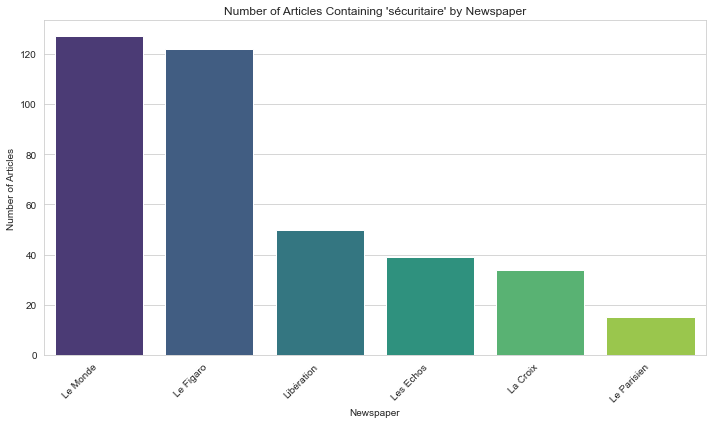

C:\Users\arceb\AppData\Local\Temp\ipykernel_99372\1963634761.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)


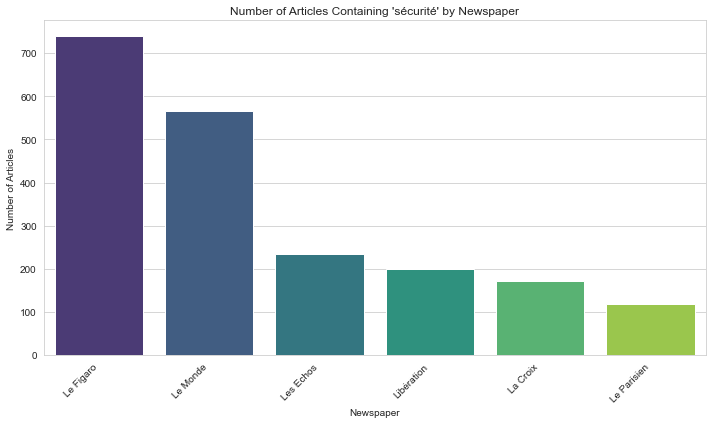

C:\Users\arceb\AppData\Local\Temp\ipykernel_99372\1963634761.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)


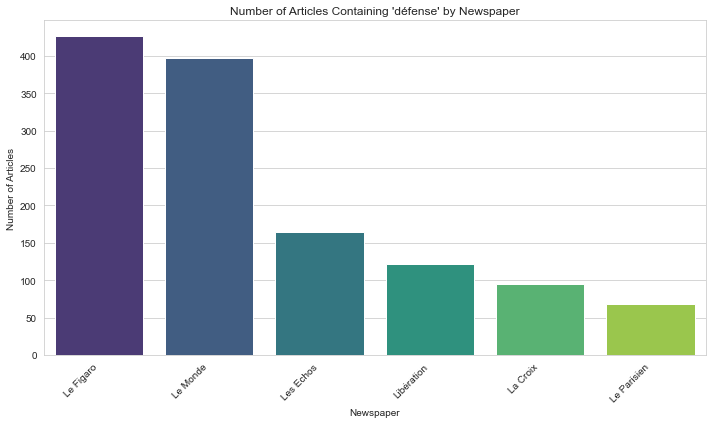

In [6]:
# List of search terms
search_terms = ["sécuritaire", "sécurité", "défense"]

# Define a function to extract the newspaper name from the text
def extract_newspaper(text):
    newspapers = ['Le Parisien', 'Le Monde', 'Libération', 'Les Echos', 'Le Figaro', 'La Croix']
    for newspaper in newspapers:
        if newspaper in text:
            return newspaper
    return 'Other'  # If none of the known newspapers are found

# Define a function to perform analysis for each search term
def analyze_search_term(search_term):
    # Filter the DataFrame to include only rows containing the search term
    filtered_df = df[df['Texte'].str.contains(search_term, case=False)]

    # Apply the function to create a new column 'Newspaper' containing the identified newspaper names
    filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)

    # Group by 'Newspaper' column and count the occurrences
    counts_by_newspaper = filtered_df['Newspaper'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts_by_newspaper.index, y=counts_by_newspaper.values, palette="viridis")
    plt.title(f"Number of Articles Containing '{search_term}' by Newspaper")
    plt.xlabel("Newspaper")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Loop through each search term and perform analysis
for term in search_terms:
    analyze_search_term(term)


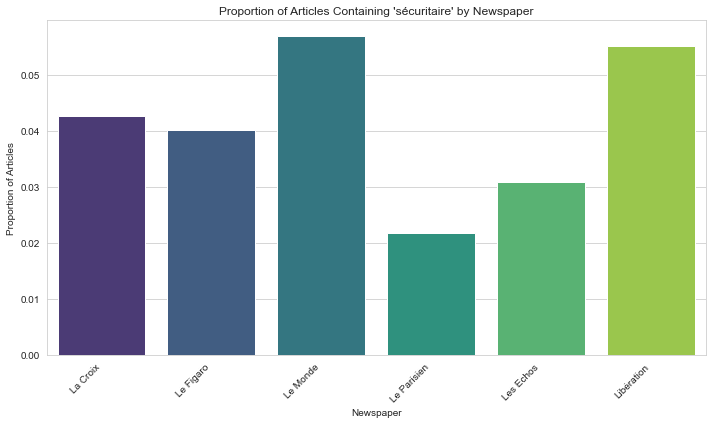

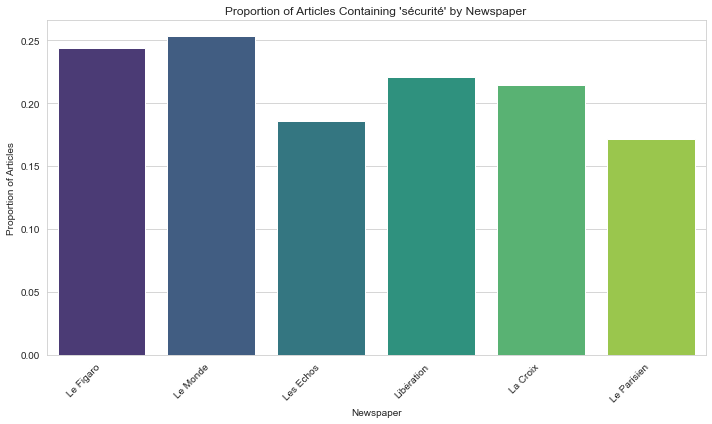

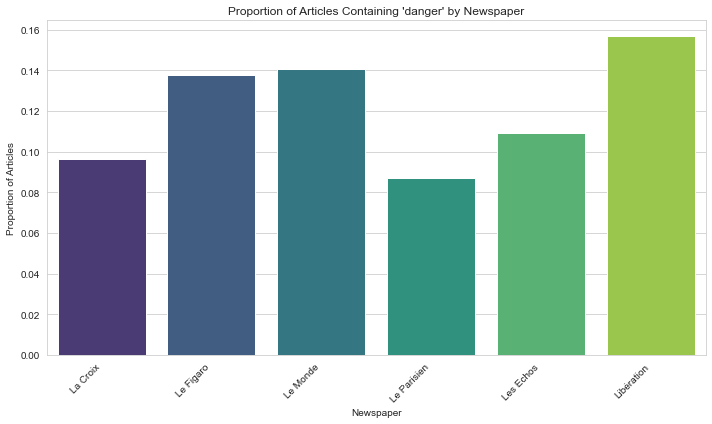

In [7]:
# List of search terms
search_terms = ["sécuritaire", "sécurité", "danger"]

# Define a function to extract the newspaper name from the text
def extract_newspaper(text):
    newspapers = ['Le Parisien', 'Le Monde', 'Libération', 'Les Echos', 'Le Figaro', 'La Croix']
    for newspaper in newspapers:
        if newspaper in text:
            return newspaper
    return 'Other'  # If none of the known newspapers are found

# Apply the function to create a new column 'Newspaper' containing the identified newspaper names
df['Newspaper'] = df['Journal'].apply(extract_newspaper)

# Count total number of articles by newspaper
total_articles_by_newspaper = df['Newspaper'].value_counts()

# Define a function to perform analysis for each search term
def analyze_search_term(search_term):
    # Filter the DataFrame to include only rows containing the search term
    filtered_df = df[df['Texte'].str.contains(search_term, case=False)]

    # Count number of articles containing the search term by newspaper
    articles_with_search_term_by_newspaper = filtered_df['Newspaper'].value_counts()

    # Calculate proportion of articles containing the search term over total articles by newspaper
    proportion_articles_with_search_term = articles_with_search_term_by_newspaper / total_articles_by_newspaper

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=proportion_articles_with_search_term.index, y=proportion_articles_with_search_term.values, palette="viridis")
    plt.title(f"Proportion of Articles Containing '{search_term}' by Newspaper")
    plt.xlabel("Newspaper")
    plt.ylabel("Proportion of Articles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Loop through each search term and perform analysis
for term in search_terms:
    analyze_search_term(term)

C:\Users\arceb\AppData\Local\Temp\ipykernel_99372\3287144933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)


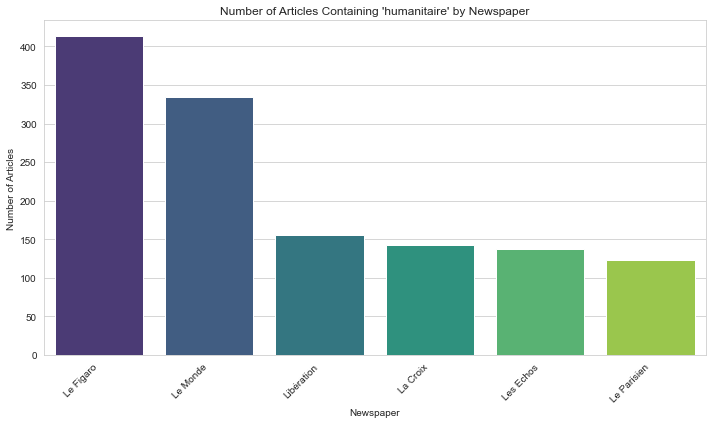

C:\Users\arceb\AppData\Local\Temp\ipykernel_99372\3287144933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)


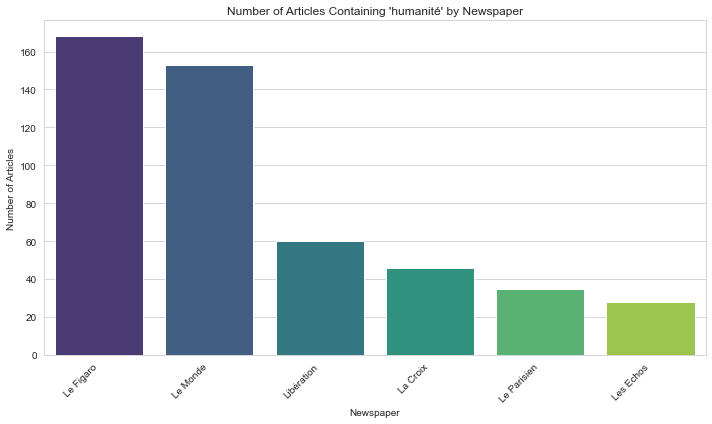

C:\Users\arceb\AppData\Local\Temp\ipykernel_99372\3287144933.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)


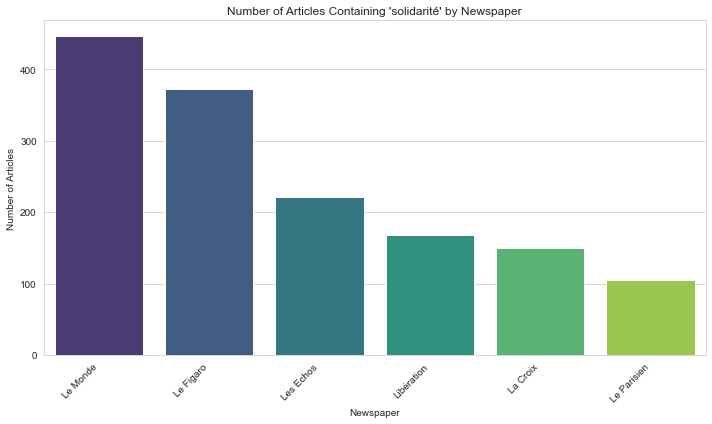

In [8]:
# List of search terms
search_terms = ["humanitaire", "humanité", "solidarité"]

# Define a function to extract the newspaper name from the text
def extract_newspaper(text):
    newspapers = ['Le Parisien', 'Le Monde', 'Libération', 'Les Echos', 'Le Figaro', 'La Croix']
    for newspaper in newspapers:
        if newspaper in text:
            return newspaper
    return 'Other'  # If none of the known newspapers are found

# Define a function to perform analysis for each search term
def analyze_search_term(search_term):
    # Filter the DataFrame to include only rows containing the search term
    filtered_df = df[df['Texte'].str.contains(search_term, case=False)]

    # Apply the function to create a new column 'Newspaper' containing the identified newspaper names
    filtered_df['Newspaper'] = filtered_df['Journal'].apply(extract_newspaper)

    # Group by 'Newspaper' column and count the occurrences
    counts_by_newspaper = filtered_df['Newspaper'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts_by_newspaper.index, y=counts_by_newspaper.values, palette="viridis")
    plt.title(f"Number of Articles Containing '{search_term}' by Newspaper")
    plt.xlabel("Newspaper")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Loop through each search term and perform analysis
for term in search_terms:
    analyze_search_term(term)


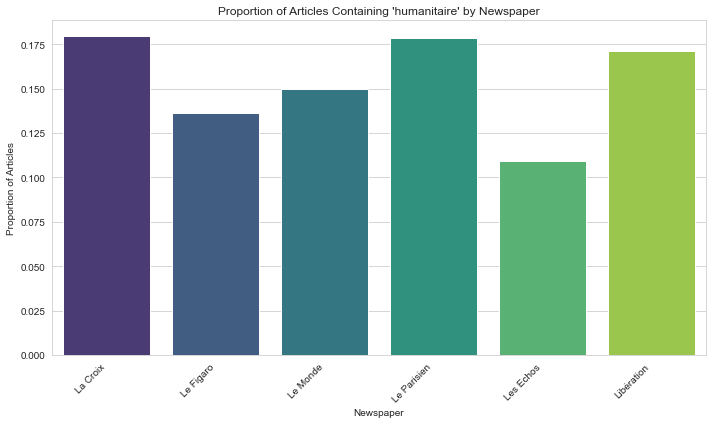

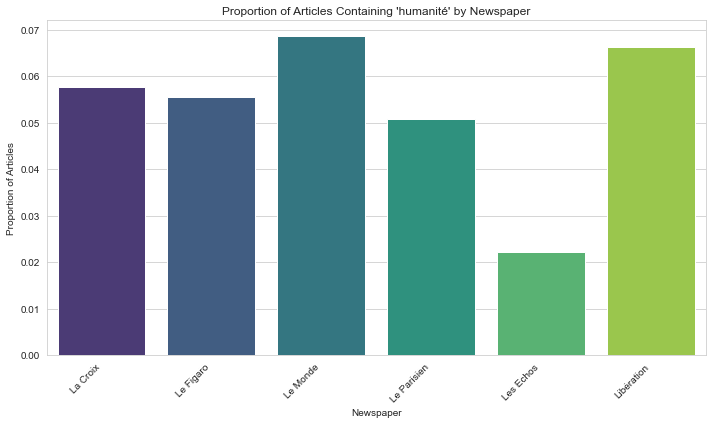

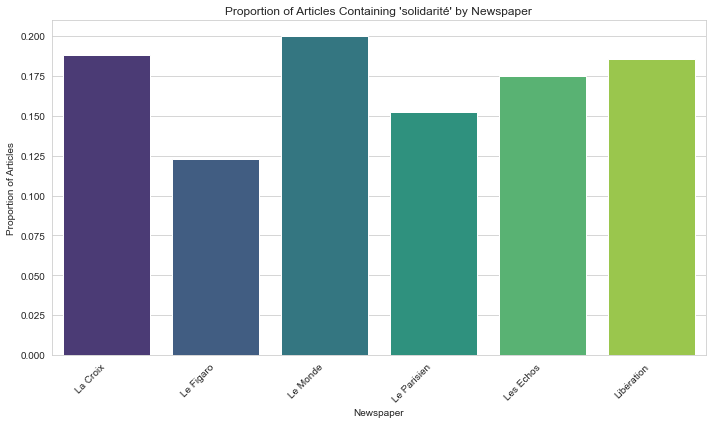

In [9]:
# List of search terms
search_terms = ["humanitaire", "humanité", "solidarité"]

# Define a function to extract the newspaper name from the text
def extract_newspaper(text):
    newspapers = ['Le Parisien', 'Le Monde', 'Libération', 'Les Echos', 'Le Figaro', 'La Croix']
    for newspaper in newspapers:
        if newspaper in text:
            return newspaper
    return 'Other'  # If none of the known newspapers are found

# Apply the function to create a new column 'Newspaper' containing the identified newspaper names
df['Newspaper'] = df['Journal'].apply(extract_newspaper)

# Count total number of articles by newspaper
total_articles_by_newspaper = df['Newspaper'].value_counts()

# Define a function to perform analysis for each search term
def analyze_search_term(search_term):
    # Filter the DataFrame to include only rows containing the search term
    filtered_df = df[df['Texte'].str.contains(search_term, case=False)]

    # Count number of articles containing the search term by newspaper
    articles_with_search_term_by_newspaper = filtered_df['Newspaper'].value_counts()

    # Calculate proportion of articles containing the search term over total articles by newspaper
    proportion_articles_with_search_term = articles_with_search_term_by_newspaper / total_articles_by_newspaper

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=proportion_articles_with_search_term.index, y=proportion_articles_with_search_term.values, palette="viridis")
    plt.title(f"Proportion of Articles Containing '{search_term}' by Newspaper")
    plt.xlabel("Newspaper")
    plt.ylabel("Proportion of Articles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Loop through each search term and perform analysis
for term in search_terms:
    analyze_search_term(term)

In [21]:
# Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    stop_words = set(stopwords.words('french'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to the 'Text' column
df['Tokens'] = df['Texte'].apply(preprocess_text)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(df['Tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['Tokens']]

# Train an LDA model
num_topics = 5  # You can adjust this based on your dataset
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Calculate coherence score for model evaluation
coherence_model = CoherenceModel(model=lda_model, texts=df['Tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score}')

(0, '0.018*"rfugis" + 0.016*"migrants" + 0.016*"a" + 0.013*"pays" + 0.010*"plus"')
(1, '0.015*"a" + 0.009*"plus" + 0.007*"pays" + 0.006*"leurope" + 0.006*"cest"')
(2, '0.020*"a" + 0.014*"rfugis" + 0.011*"plus" + 0.009*"syriens" + 0.008*"syrie"')
(3, '0.019*"a" + 0.008*"plus" + 0.005*"cest" + 0.004*"cette" + 0.004*"ans"')
(4, '0.022*"a" + 0.008*"plus" + 0.008*"parti" + 0.008*"merkel" + 0.006*"droite"')
Coherence Score: 0.32404202894975737


In [10]:
# Filter articles containing the term "Africa"
search_term = "Afrique"
filtered_articles_africa = df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_africa

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
5,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le...,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde,Le Monde
8,Libération (site web),"Schengen, l'autre victime du coronavirus",2020-03-19,Boris Grésillon,"Bien que le Covid-19 se joue des frontières, l...",onde s'hérisse de barrières. Ce paradoxe souli...,résillon professeur de géographie à Aix-Marsei...,Libération,Libération
15,"Les Echos, no. 23154",Erdogan à Bruxelles pour démêler la crise des...,2020-03-09,CATHERINE CHATIGNOUX,"Samedi, Recep Tayyip Erdogan semblait jouer l'...",almie. « Sur ordre du président [...] aucun...,Union européenne. II a jusqu'ici refusé les 50...,Echos,Les Echos
24,Les Echos (site web),BHL : « Cette société française me fait peur »,2020-03-05,DANIEL FORTIN; NICOLAS BARRE,"Vous avez entrepris, depuis quelques semaines,...",vous rendre sur plusieurs théâtres de conflit...,es crimes de la bande à Baader. Jürgen Haberma...,Echos,Les Echos
54,Le Monde (site web),Une photo de prétendus « réfugiés européens » ...,2019-10-18,Assma Maad,Des images relayées depuis la crisedesmigrants...,2015 circulent régulièrement depuis sur les r...,"érieur du stade de football local, ont été des...",Monde,Le Monde
...,...,...,...,...,...,...,...,...,...
8897,Le Parisien,Erdogan à Merkel : la Turquie veut ouvrir une ...,2020-07-24,NaN,"&gt; L'essentiel Mercredi, la France a enreg...",NaN,NaN,Parisien,Le Parisien
8908,Libération,L'Union européenne ménage le Maroc,2020-06-24,NaN,"pages 20-21 Vous avez été rincés par 2020, e...",ous en avez assez des analyses à l'em-porte-pi...,"de nos incertitudes, de nos peurs. Un livre p...",Libération,Libération
8909,Le Parisien,Accord entre l'UE et Athènes pour un nouveau c...,2020-06-24,NaN,"Une tente, deux, trois... Sept ce samedi. Et d...",duvets. Sous les poutrelles métalliques du mét...,"s 1 000 places, sinon nous organiserons d'autr...",Parisien,Le Parisien
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, i...","nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos,Les Echos


In [11]:
search_term = "Moyen-Orient"
filtered_articles_mo = df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_mo

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
20,Le Figaro (site web),«Vague migratoire: le seul moyen de faire recu...,2020-03-06,"Bonnamy, Jean-Loup",Renaud Girard est correspondant de guerre et c...,niqueur international du Figaro. FIGAROVOX.- P...,"» . Si nous l’avions fait, nous pourrions joue...",Figaro,Le Figaro
25,"Le Figaro, no. 23497",Il faut défendre les frontières de l'Europe !,2020-03-03,"Girard, Renaud",Les frontières de l'Europe sont attaquées. Dim...,"he 1er mars 2020, de solides jeunes barbus, cr...",ter démocratiquement sur ce point les sociétés...,Figaro,Le Figaro
116,Le Monde,Ingérences russes 1 | 6 - Poutine parrain de l...,2019-04-04,Isabelle Mandraud,Moscou correspondante - Le buste penché en ava...,"sur la ­table, Vladimir Poutine darde un regar...","cept de « démocratie souveraine », qui a large...",Monde,Le Monde
167,"Le Figaro, no. 23094",Les trouble-fête conviés à la table d'Emmanuel...,2018-11-12,"Jaulmes, Adrien",À CHAQUE réunion de famille ses trouble-fête. ...,mi les quelque soixante-dix chefs d'État et de...,onies qui commémoraient la fin de l'un des plu...,Figaro,Le Figaro
188,"Le Figaro, no. 23058",Europe : l'élection de tous les dangers,2018-10-01,"Baverez, Nicolas","Cent ans après la fin de la Grande Guerre, l'U...",n européenne affronte une crise existentielle....,n'est pas Emmanuel Macron qui refermera la pa...,Figaro,Le Figaro
...,...,...,...,...,...,...,...,...,...
8763,Le Figaro,Crise migratoire: Kamala Harris se rendra fin...,2022-01-27,NaN,Une première équipe de six gardes-frontières d...,agence européenne Frontex a commencé à travail...,lux. Le nombre de gardes-frontières de Frontex...,Figaro,Le Figaro
8794,Le Figaro,"En Italie, malgré Draghi, la politique reprend...",2021-11-25,NaN,Correspondant à Washington Biden bat le rappel...,ses alliés. Le premier voyage d’un président ...,"aine. La troisième continuité, cette fois limi...",Figaro,Le Figaro
8877,Libération,Migrants en Bosnie?: « Le gouvernement doit op...,2020-12-15,NaN,Augmentation de 137% des demandes d'asile Su...,"a route migratoire des Balkans, la ville de Ti...",r leurs propres aïeux ont parfois traversé le ...,Libération,Libération
8878,Libération,Allemagne?: prison à vie pour le néonazi meurt...,2020-12-06,NaN,"pages 20-21 S elon les manifestants, la ma...",e du 22 Februaryen Algérie n'est pas seulement...,"mulé, au cours des dix dernières années, un ba...",Libération,Libération


In [12]:
search_term = "sécurité"
filtered_articles_secu= df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_secu

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
5,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le...,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde,Le Monde
7,Le Monde,Télésommet sur Idlib entre les Européens et Er...,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jég...,Istanbul correspondante - Le coronavirus boule...,"se tout, mais les dirigeants européens ont enc...","mmentaires, en rappelant « l'offensive militai...",Monde,Le Monde
13,La Croix (site web),Crise migratoire?: bras de fer autour de la fr...,2020-03-11,Marie Verdier,Après la visite du président turc Recep Tayyip...,"dogan à Bruxelles, lundi 9 mars, Emmanuel Macr...",nement pour faire face à l'afflux migratoire e...,Croix,La Croix
17,Les Echos (site web),Migrants : l'Europe propose d'accueillir 1.500...,2020-03-09,LES ECHOS,Situation ultra-tendue en Grèce. Lescamps de r...,giés surpeuplés et les conditions de vie de pl...,"de sécurité, de stabilité dans la région et d...",Echos,Les Echos
21,Le Figaro (site web),La Lettre du Figaro du 6 mars 2020,2020-03-06,"Meteyer, Madeleine","Bonjour très chers abonnés, Ah, la douce pai...",’une vie dans une petite commune de province! ...,prendre des photos dans le métro était interdi...,Figaro,Le Figaro
...,...,...,...,...,...,...,...,...,...
8886,Libération,Allemagne: baisse de 30% des demandes d'asile ...,2020-09-08,NaN,Mays qu'est-ce qui ne tourne pas rond chez Fro...,x ? Le navire amiral chargé de la protection d...,ptage sur le duo français à la tête de l'agenc...,Libération,Libération
8887,Libération,"Le Brexit, un nouveau départ pour l'Union?",2020-09-09,NaN,Une retraitée adopte deux migrants : «Ils m'on...,endue meilleure» Mays qu'est-ce qui ne tourn...,"ole à lettre. Elle est pourtant, s'agace-t-on ...",Libération,Libération
8898,Le Figaro,Droit d'asile : la Hongrie condamnée pour avoi...,2020-07-22,NaN,Laurent Chalard est géographe et travaille au ...,opean Centre for International Affairs. Retrou...,enées par les différents gouvernements sur la ...,Figaro,Le Figaro
8908,Libération,L'Union européenne ménage le Maroc,2020-06-24,NaN,"pages 20-21 Vous avez été rincés par 2020, e...",ous en avez assez des analyses à l'em-porte-pi...,"de nos incertitudes, de nos peurs. Un livre p...",Libération,Libération


In [13]:
search_term = "humanitaire"
filtered_articles_humanitaire= df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_humanitaire

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro,Le Figaro
7,Le Monde,Télésommet sur Idlib entre les Européens et Er...,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jég...,Istanbul correspondante - Le coronavirus boule...,"se tout, mais les dirigeants européens ont enc...","mmentaires, en rappelant « l'offensive militai...",Monde,Le Monde
13,La Croix (site web),Crise migratoire?: bras de fer autour de la fr...,2020-03-11,Marie Verdier,Après la visite du président turc Recep Tayyip...,"dogan à Bruxelles, lundi 9 mars, Emmanuel Macr...",nement pour faire face à l'afflux migratoire e...,Croix,La Croix
14,Le Figaro (site web),Syrie: le président turc demande le «soutien c...,2020-03-09,Le Figaro avec AFP,Le président turc Recep Tayyip Erdogan a deman...,à l'Otan son « soutien concret » dans le confl...,"un pays voisin, rejette la faute sur la Turqui...",Figaro,Le Figaro
17,Les Echos (site web),Migrants : l'Europe propose d'accueillir 1.500...,2020-03-09,LES ECHOS,Situation ultra-tendue en Grèce. Lescamps de r...,giés surpeuplés et les conditions de vie de pl...,"de sécurité, de stabilité dans la région et d...",Echos,Les Echos
...,...,...,...,...,...,...,...,...,...
8875,Le Monde,Jean-Thomas Lesueur: «Les attaques contre Fron...,2021-02-07,NaN,"Leurs corps calcinés ont été rapatriés, vendre...","12 march, au Guatemala. Une promesse du gouver...","enter quand même la traversée », réagit M. Gon...",Monde,Le Monde
8877,Libération,Migrants en Bosnie?: « Le gouvernement doit op...,2020-12-15,NaN,Augmentation de 137% des demandes d'asile Su...,"a route migratoire des Balkans, la ville de Ti...",r leurs propres aïeux ont parfois traversé le ...,Libération,Libération
8893,Les Echos,"2020, l'année furieuse",2020-08-14,NaN,C'est un plongeon généralisé. Tous les indicat...,s de flux d'entrée et de séjour sur le territo...,mie a également influé sur les sorties du terr...,Echos,Les Echos
8897,Le Parisien,Erdogan à Merkel : la Turquie veut ouvrir une ...,2020-07-24,NaN,"&gt; L'essentiel Mercredi, la France a enreg...",NaN,NaN,Parisien,Le Parisien


In [14]:
search_term = "menace"
filtered_articles_menace= df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_menace

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro,Le Figaro
20,Le Figaro (site web),«Vague migratoire: le seul moyen de faire recu...,2020-03-06,"Bonnamy, Jean-Loup",Renaud Girard est correspondant de guerre et c...,niqueur international du Figaro. FIGAROVOX.- P...,"» . Si nous l’avions fait, nous pourrions joue...",Figaro,Le Figaro
21,Le Figaro (site web),La Lettre du Figaro du 6 mars 2020,2020-03-06,"Meteyer, Madeleine","Bonjour très chers abonnés, Ah, la douce pai...",’une vie dans une petite commune de province! ...,prendre des photos dans le métro était interdi...,Figaro,Le Figaro
23,"Le Figaro, no. 23499",Frans Timmermans : « Ce projet de loi est révo...,2020-03-05,"Rovan, Anne",Frans Timmermans est le vice-président exécuti...,e la Commission européenne en charge de l'Acti...,et la société polonaises de cette transition ...,Figaro,Le Figaro
24,Les Echos (site web),BHL : « Cette société française me fait peur »,2020-03-05,DANIEL FORTIN; NICOLAS BARRE,"Vous avez entrepris, depuis quelques semaines,...",vous rendre sur plusieurs théâtres de conflit...,es crimes de la bande à Baader. Jürgen Haberma...,Echos,Les Echos
...,...,...,...,...,...,...,...,...,...
8890,La Croix,«Il y a toujours quelque chose à faire pour ch...,2020-08-29,NaN,Analyse Stephan E. a été condamné jeudi 28 Jan...,r à la réclusion criminelle à perpétuité pour ...,: « Le procès est peut-être terminé Mays la co...,Croix,La Croix
8891,Les Echos,Un nouvel élan pour l'intégration européenne ?,2020-08-30,NaN,Cela aurait pu être l'étincelle dans le baril ...,"poudre. Pour les Européens, le Brexit avait to...","en, malgré son manque de maniabilité,reste l'e...",Echos,Les Echos
8897,Le Parisien,Erdogan à Merkel : la Turquie veut ouvrir une ...,2020-07-24,NaN,"&gt; L'essentiel Mercredi, la France a enreg...",NaN,NaN,Parisien,Le Parisien
8902,Libération,La France peut-elle fermer ses frontières aux ...,2020-06-30,NaN,"Beaucoup, à Bruxelles ou dans les capitales eu...","éennes, veulent croire que la sortie complète ...",1973 et 2020. Photo : Yves Herman. Reuters ...,Libération,Libération


In [15]:
search_term = "migrant"
filtered_articles_migrant= df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_migrant

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro,Le Figaro
1,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde,Le Monde
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro,Le Figaro
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamb...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26 mars, les Vingt-Sept doivent se réuni...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, n’est pas s...",Monde,Le Monde
4,Le Monde (site web),Marc Lazar : « Plus l’Italie fait nation face ...,2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à...,date du 25 mars le plus grand nombre de morts...,t de la School of Government de la Luiss (Libr...,Monde,Le Monde
...,...,...,...,...,...,...,...,...,...
8911,Le Figaro,"« La Turquie d'Erdogan, ce laboratoire bellici...",2020-06-11,NaN,Le président turc Recep Tayyip Erdogan a assur...,endredi 18 decemberà la chancelière allemande ...,antage aux migrants. L'Union européenne a fina...,Figaro,Le Figaro
8912,Le Figaro,Immigration?: l'Union européenne ménage le Maroc,2020-06-08,NaN,La Hongrie a été condamnée jeudi 17 decemberpa...,la Cour de justice de l'Union européenne pour ...,ratoire. &gt; &gt; VOIR AUSSI - « Nous reve...,Figaro,Le Figaro
8914,La Croix,Migrants en mer Egée : «Ça a été les deux heur...,2020-04-15,NaN,"Les faits En 2015, des «?zones de transit?» av...",nt été mises en place par le pays dans les vil...,programme lancé en 2015 de répartition par Éta...,Croix,La Croix
8915,Le Figaro,"Migrants: Dakhla, point de départ du grand cou...",2020-04-14,NaN,Bruxelles espère arriver à des « résultats imp...,ants » en 2021 sur la réforme de l'asile prése...,oit d'asile depuis le pays européen où ils son...,Figaro,Le Figaro


In [16]:
search_term = "réfugié"
filtered_articles_réfugié= df[df['Texte'].str.contains(search_term, case=False)]

# Display the filtered articles
filtered_articles_réfugié

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,Newspaper
6,Le Monde,Géopolitique | chronique Nous sommes tous de...,2020-03-19,par Philippe Bernard,"Jusqu'à la crise du coronavirus, la liberté de...","anchir librement les frontières, de sillonner ...",our les malheureux jetés sur les routes de l'e...,Monde,Le Monde
7,Le Monde,Télésommet sur Idlib entre les Européens et Er...,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jég...,Istanbul correspondante - Le coronavirus boule...,"se tout, mais les dirigeants européens ont enc...","mmentaires, en rappelant « l'offensive militai...",Monde,Le Monde
9,Le Monde (site web),Crise des migrants : « Ce qui se passe aujourd...,2020-03-14,Julia Pascual,"« Dans la nuit du 27 au 28 février, j’ai appri...",ue la Turquie n’allait plus empêcher l’arrivée...,re. J’espère que cela agira comme un coup de s...,Monde,Le Monde
13,La Croix (site web),Crise migratoire?: bras de fer autour de la fr...,2020-03-11,Marie Verdier,Après la visite du président turc Recep Tayyip...,"dogan à Bruxelles, lundi 9 mars, Emmanuel Macr...",nement pour faire face à l'afflux migratoire e...,Croix,La Croix
14,Le Figaro (site web),Syrie: le président turc demande le «soutien c...,2020-03-09,Le Figaro avec AFP,Le président turc Recep Tayyip Erdogan a deman...,à l'Otan son « soutien concret » dans le confl...,"un pays voisin, rejette la faute sur la Turqui...",Figaro,Le Figaro
...,...,...,...,...,...,...,...,...,...
8909,Le Parisien,Accord entre l'UE et Athènes pour un nouveau c...,2020-06-24,NaN,"Une tente, deux, trois... Sept ce samedi. Et d...",duvets. Sous les poutrelles métalliques du mét...,"s 1 000 places, sinon nous organiserons d'autr...",Parisien,Le Parisien
8911,Le Figaro,"« La Turquie d'Erdogan, ce laboratoire bellici...",2020-06-11,NaN,Le président turc Recep Tayyip Erdogan a assur...,endredi 18 decemberà la chancelière allemande ...,antage aux migrants. L'Union européenne a fina...,Figaro,Le Figaro
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, i...","nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos,Les Echos
8914,La Croix,Migrants en mer Egée : «Ça a été les deux heur...,2020-04-15,NaN,"Les faits En 2015, des «?zones de transit?» av...",nt été mises en place par le pays dans les vil...,programme lancé en 2015 de répartition par Éta...,Croix,La Croix


## Wordclouds

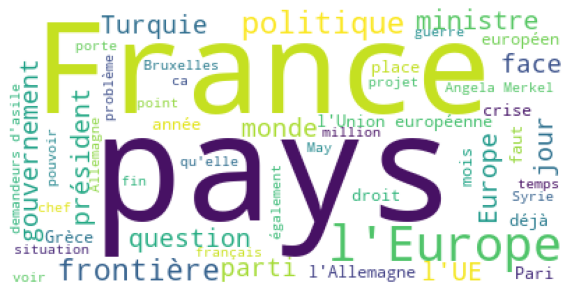

In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('stop_word_fr.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

# Concatenate all texts into a single string
text = ' '.join(df['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

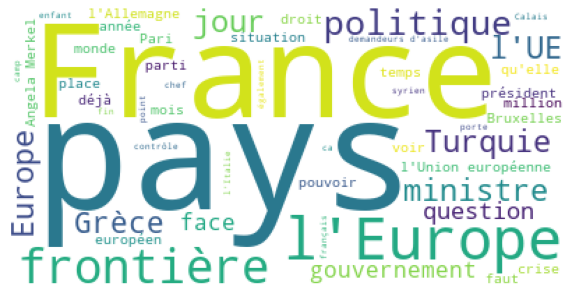

In [21]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_migrant['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

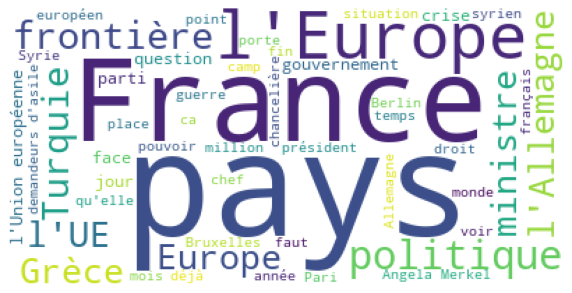

In [22]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_réfugié['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Moyen-Orient

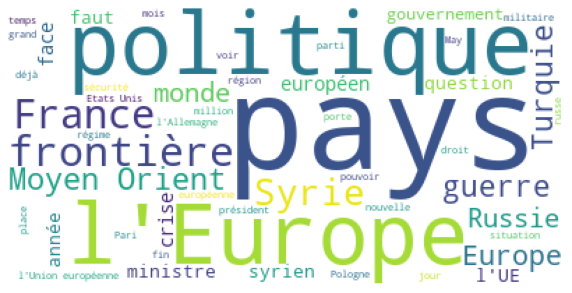

In [27]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_mo['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Sécuritaire

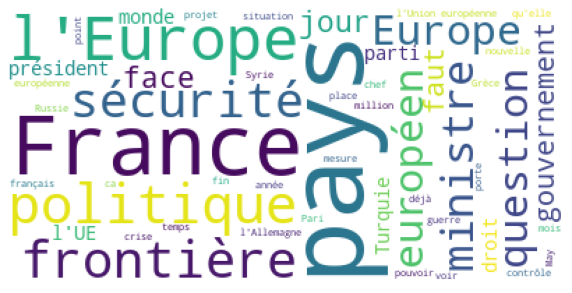

In [24]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_secu['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Afrique

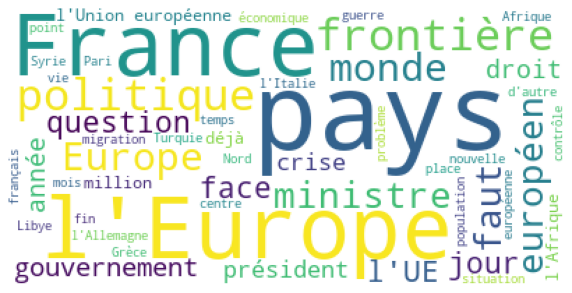

In [25]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_africa['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Humanitaire

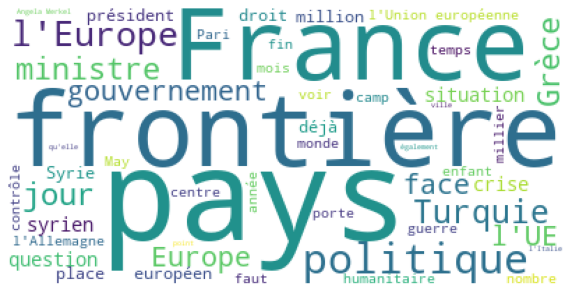

In [26]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_humanitaire['Texte'])

# Remove specified terms from the text
specified_terms = ["réfugié", "migrant", "n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Creation of subdatasets

To create datasets based on the origin of migrants or refugees mentioned in your newspaper articles, you can follow these steps using Python and the pandas library:

    Tokenization and Named Entity Recognition (NER): Use a Natural Language Processing (NLP) library like spaCy to tokenize your text and identify named entities, including locations.

    Filtering by Location: Identify mentions of countries or regions associated with each continent (e.g., Northern countries, Middle East, Africa, Asia, Latin America) and filter articles accordingly.

    Create Datasets: Create separate datasets for each continent based on the filtered articles.

Here's a basic outline of how you could implement this using Python and pandas:

In [42]:
import sys
print(sys.executable)

C:\Users\arceb\AppData\Local\Programs\Python\Python39\python.exe


In [43]:
import site
print(site.getsitepackages())

['C:\\Users\\arceb\\AppData\\Local\\Programs\\Python\\Python39', 'C:\\Users\\arceb\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages']


In [6]:
import pandas as pd
import spacy
from spacy.lang.fr.examples import sentences

nlp = spacy.load("fr_core_news_sm")


def get_continent(location):
    # Define a dictionary mapping countries/regions to continents
    continent_mapping = {
        "North": ["France", "Germany", "United Kingdom", "Canada", "United States", "Sweden", "Norway", "Denmark", "Finland", "Netherlands", "Belgium"],
        "Middle East": ["Syria", "Iraq", "Afghanistan", "Iran", "Turkey", "Lebanon", "Jordan", "Israel", "Saudi Arabia", "Yemen"],
        "Africa": ["Nigeria", "Eritrea", "Somalia", "Sudan", "Ethiopia", "South Africa", "Mali", "Chad", "Niger", "Burkina Faso", "Senegal"],
        "Asia": ["Pakistan", "India", "Bangladesh", "Myanmar", "Philippines", "Vietnam", "China", "Japan", "Thailand", "Indonesia"],
        "Latin America": ["Mexico", "Guatemala", "Honduras", "El Salvador", "Venezuela", "Colombia", "Brazil", "Peru", "Ecuador", "Bolivia"]
    }

    # Iterate over continent_mapping to find the continent for the given location
    for continent, countries in continent_mapping.items():
        if location in countries:
            return continent

    # If location is not found in any continent, return None
    return None

OSError: [E050] Can't find model 'fr_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [4]:
# Function to filter articles by continent
def filter_articles_by_continent(article):
    doc = nlp(article)
    # Extract locations mentioned in the article
    locations = [ent.text for ent in doc.ents if ent.label_ == "LOC"]
    # Determine continent for each location
    continents = [get_continent(loc) for loc in locations]
    # Check if any continent matches the desired continent
    if any(continents):
        return True
    else:
        return False

In [ ]:
# Apply filtering function to create separate datasets for each continent
north_df = df[df["Texte"].apply(filter_articles_by_continent)]
middle_east_df = df[df["Texte"].apply(filter_articles_by_continent)]
africa_df = df[df["Texte"].apply(filter_articles_by_continent)]
asia_df = df[df["Texte"].apply(filter_articles_by_continent)]
latin_america_df = df[df["Texte"].apply(filter_articles_by_continent)]

### Datasets nationalités

In [39]:
# Liste des pays avec leur nationalité, capitale et continent
pays_nationalite = [
    ("Afghanistan", "Afghan", "Kaboul", "Asie"),
    ("Afrique du Sud", "Sud-africain", "Pretoria", "Afrique"),
    ("Albanie", "Albanais", "Tirana", "Europe"),
    ("Algérie", "Algérien", "Alger", "Afrique"),
    ("Allemagne", "Allemand", "Berlin", "Europe"),
    ("Andorre", "Andorran", "Andorre-la-Vieille", "Europe"),
    ("Angola", "Angolais", "Luanda", "Afrique"),
    ("Antigua-et-Barbuda", "Antiguais", "Saint John's", "Amérique du Nord"),
    ("Arabie saoudite", "Saoudien", "Riyad", "Asie"),
    ("Argentine", "Argentin", "Buenos Aires", "Amérique du Sud"),
    ("Arménie", "Arménien", "Erevan", "Europe"),
    ("Australie", "Australien", "Canberra", "Océanie"),
    ("Autriche", "Autrichien", "Vienne", "Europe"),
    ("Azerbaïdjan", "Azéri", "Bakou", "Europe"),
    # Continuer la liste avec les autres pays et leurs informations
    ("Zimbabwe", "Zimbabwéen", "Harare", "Afrique"),
    ("Égypte", "Égyptien", "Le Caire", "Afrique"),
    ("Émirats arabes unis", "Émirien", "Abou Dabi", "Asie"),
    ("Équateur", "Équatorien", "Quito", "Amérique du Sud"),
    ("Érythrée", "Érythréen", "Asmara", "Afrique"),
    ("Espagne", "Espagnol", "Madrid", "Europe"),
    ("Estonie", "Estonien", "Tallinn", "Europe"),
    ("États-Unis", "Américain", "Washington", "Amérique du Nord"),
    ("Éthiopie", "Éthiopien", "Addis-Abeba", "Afrique"),
    ("Fidji", "Fidjien", "Suva", "Océanie"),
    ("Finlande", "Finlandais", "Helsinki", "Europe"),
    ("France", "Français", "Paris", "Europe"),
    ("Gabon", "Gabonais", "Libreville", "Afrique"),
    ("Gambie", "Gambien", "Banjul", "Afrique"),
    ("Géorgie", "Géorgien", "Tbilissi", "Europe"),
    ("Ghana", "Ghanéen", "Accra", "Afrique"),
    ("Grèce", "Grec", "Athènes", "Europe"),
    ("Grenade", "Grenadien", "Saint-Georges", "Amérique du Nord"),
    ("Guatemala", "Guatémaltèque", "Guatemala", "Amérique du Nord"),
    ("Guinée", "Guinéen", "Conakry", "Afrique"),
    ("Guinée-Bissau", "Bissau-Guinéen", "Bissau", "Afrique"),
    ("Guinée équatoriale", "Équatoguinéen", "Malabo", "Afrique"),
    ("Guyana", "Guyanais", "Georgetown", "Amérique du Sud"),
    ("Haïti", "Haïtien", "Port-au-Prince", "Amérique du Nord"),
    ("Honduras", "Hondurien", "Tegucigalpa", "Amérique du Nord"),
    ("Hongrie", "Hongrois", "Budapest", "Europe"),
    ("Îles Marshall", "Marshallais", "Majuro", "Océanie"),
    ("Inde", "Indien", "New Delhi", "Asie"),
    ("Indonésie", "Indonésien", "Jakarta", "Asie"),
    ("Irak", "Irakien", "Bagdad", "Asie"),
    ("Iran", "Iranien", "Téhéran", "Asie"),
    ("Irlande", "Irlandais", "Dublin", "Europe"),
    ("Islande", "Islandais", "Reykjavik", "Europe"),
    ("Israël", "Israélien", "Jérusalem", "Asie"),
    ("Italie", "Italien", "Rome", "Europe"),
    ("Jamaïque", "Jamaïcain", "Kingston", "Amérique du Nord"),
    ("Japon", "Japonais", "Tokyo", "Asie"),
    ("Jordanie", "Jordanien", "Amman", "Asie"),
    ("Kazakhstan", "Kazakh", "Noursoultan", "Asie"),
    ("Kenya", "Kényan", "Nairobi", "Afrique"),
    ("Kirghizistan", "Kirghize", "Bichkek", "Asie"),
    ("Kiribati", "Kiribatien", "Tarawa", "Océanie"),
    ("Koweït", "Koweïtien", "Koweït", "Asie"),
    ("Laos", "Laotien", "Vientiane", "Asie"),
    ("Lesotho", "Lesothan", "Maseru", "Afrique"),
    ("Lettonie", "Letton", "Riga", "Europe"),
    ("Liban", "Libanais", "Beyrouth", "Asie"),
    ("Libéria", "Libérien", "Monrovia", "Afrique"),
    ("Libye", "Libyen", "Tripoli", "Afrique"),
    ("Liechtenstein", "Liechtensteinois", "Vaduz", "Europe"),
    ("Lituanie", "Lituanien", "Vilnius", "Europe"),
    ("Luxembourg", "Luxembourgeois", "Luxembourg", "Europe"),
    ("Macédoine du Nord", "Macédonien", "Skopje", "Europe"),
    ("Madagascar", "Malgache", "Antananarivo", "Afrique"),
    ("Malaisie", "Malaisien", "Kuala Lumpur", "Asie"),
    ("Malawi", "Malawien", "Lilongwe", "Afrique"),
    ("Maldives", "Maldivien", "Malé", "Asie"),
    ("Mali", "Malien", "Bamako", "Afrique"),
    ("Malte", "Maltais", "La Valette", "Europe"),
    ("Maroc", "Marocain", "Rabat", "Afrique"),
    ("Maurice", "Mauricien", "Port-Louis", "Afrique"),
    ("Mauritanie", "Mauritanien", "Nouakchott", "Afrique"),
    ("Mexique", "Mexicain", "Mexico", "Amérique du Nord"),
    ("Micronésie", "Micronésien", "Palikir", "Océanie"),
    ("Moldavie", "Moldave", "Chisinau", "Europe"),
    ("Monaco", "Monégasque", "Monaco", "Europe"),
    ("Mongolie", "Mongol", "Oulan-Bator", "Asie"),
    ("Monténégro", "Monténégrin", "Podgorica", "Europe"),
    ("Mozambique", "Mozambicain", "Maputo", "Afrique"),
    ("Namibie", "Namibien", "Windhoek", "Afrique"),
    ("Nauru", "Nauruan", "Yaren", "Océanie"),
    ("Népal", "Népalais", "Katmandou", "Asie"),
    ("Nicaragua", "Nicaraguayen", "Managua", "Amérique du Nord"),
    ("Niger", "Nigérien", "Niamey", "Afrique"),
    ("Nigeria", "Nigérian", "Abuja", "Afrique"),
    ("Niue", "Niuéen", "Alofi", "Océanie"),
    ("Norvège", "Norvégien", "Oslo", "Europe"),
    ("Nouvelle-Zélande", "Néo-zélandais", "Wellington", "Océanie"),
    ("Oman", "Omanais", "Mascate", "Asie"),
    ("Ouganda", "Ougandais", "Kampala", "Afrique"),
    ("Ouzbékistan", "Ouzbek", "Tachkent", "Asie"),
    ("Pakistan", "Pakistanais", "Islamabad", "Asie"),
    ("Palaos", "Palauan", "Ngerulmud", "Océanie"),
    ("Panama", "Panaméen", "Panama", "Amérique du Nord"),
    ("Papouasie-Nouvelle-Guinée", "Papouan-Néo-Guinéen", "Port Moresby", "Océanie"),
    ("Paraguay", "Paraguayen", "Asunción", "Amérique du Sud"),
    ("Pays-Bas", "Néerlandais", "Amsterdam", "Europe"),
    ("Pérou", "Péruvien", "Lima", "Amérique du Sud"),
    ("Philippines", "Philippin", "Manille", "Asie"),
    ("Pologne", "Polonais", "Varsovie", "Europe"),
    ("Portugal", "Portugais", "Lisbonne", "Europe"),
    ("Qatar", "Qatarien", "Doha", "Asie"),
    ("République centrafricaine", "Centrafricain", "Bangui", "Afrique"),
    ("République démocratique du Congo", "Congolais", "Kinshasa", "Afrique"),
    ("République dominicaine", "Dominicain", "Saint-Domingue", "Amérique du Nord"),
    ("République tchèque", "Tchèque", "Prague", "Europe"),
    ("Roumanie", "Roumain", "Bucarest", "Europe"),
    ("Royaume-Uni", "Britannique", "Londres", "Europe"),
    ("Russie", "Russe", "Moscou", "Europe"),
    ("Rwanda", "Rwandais", "Kigali", "Afrique"),
    ("Saint-Christophe-et-Niévès", "Saint-Christophien et Névicien", "Basseterre", "Amérique du Nord"),
    ("Saint-Marin", "Saint-Marinais", "Saint-Marin", "Europe"),
    ("Saint-Vincent-et-les-Grenadines", "Saint-Vincentais et Grenadin", "Kingstown", "Amérique du Nord"),
    ("Sainte-Lucie", "Saint-Lucien", "Castries", "Amérique du Nord"),
    ("Salomon", "Salomonais", "Honiara", "Océanie"),
    ("Salvador", "Salvadorien", "San Salvador", "Amérique du Nord"),
    ("Samoa", "Samoan", "Apia", "Océanie"),
    ("São Tomé-et-Príncipe", "Santoméen", "São Tomé", "Afrique"),
    ("Sénégal", "Sénégalais", "Dakar", "Afrique"),
    ("Serbie", "Serbe", "Belgrade", "Europe"),
    ("Seychelles", "Seychellois", "Victoria", "Afrique"),
    ("Sierra Leone", "Sierra-léonais", "Freetown", "Afrique"),
    ("Singapour", "Singapourien", "Singapour", "Asie"),
    ("Slovaquie", "Slovaque", "Bratislava", "Europe"),
    ("Slovénie", "Slovène", "Ljubljana", "Europe"),
    ("Somalie", "Somalien", "Mogadiscio", "Afrique"),
    ("Soudan", "Soudanais", "Khartoum", "Afrique"),
    ("Soudan du Sud", "Sud-Soudanais", "Djouba", "Afrique"),
    ("Sri Lanka", "Sri-lankais", "Sri Jayawardenapura Kotte", "Asie"),
    ("Suède", "Suédois", "Stockholm", "Europe"),
    ("Suisse", "Suisse", "Berne", "Europe"),
    ("Suriname", "Surinamien", "Paramaribo", "Amérique du Sud"),
    ("Syrie", "Syrien", "Damas", "Asie"),
    ("Swaziland", "Swazilandais", "Mbabane", "Afrique"),
    ("Tadjikistan", "Tadjik", "Douchanbé", "Asie"),
    ("Tanzanie", "Tanzanien", "Dodoma", "Afrique"),
    ("Tchad", "Tchadien", "N'Djaména", "Afrique"),
    ("Thaïlande", "Thaïlandais", "Bangkok", "Asie"),
    ("Timor oriental", "Est-timorais", "Dili", "Asie"),
    ("Togo", "Togolais", "Lomé", "Afrique"),
    ("Tonga", "Tongan", "Nuku'alofa", "Océanie"),
    ("Trinité-et-Tobago", "Trinidadien", "Port-d'Espagne", "Amérique du Nord"),
    ("Tunisie", "Tunisien", "Tunis", "Afrique"),
    ("Turkménistan", "Turkmène", "Achgabat", "Asie"),
    ("Turquie", "Turc", "Ankara", "Europe"),
    ("Tuvalu", "Tuvaluan", "Funafuti", "Océanie"),
    ("Ukraine", "Ukrainien", "Kiev", "Europe"),
    ("Uruguay", "Uruguayen", "Montevideo", "Amérique du Sud"),
    ("Vanuatu", "Vanuatuan", "Port-Vila", "Océanie"),
    ("Vatican", "Vaticanais", "Vatican", "Europe"),
    ("Venezuela", "Vénézuélien", "Caracas", "Amérique du Sud"),
    ("Viêt Nam", "Vietnamien", "Hanoï", "Asie"),
    ("Yémen", "Yéménite", "Sanaa", "Asie"),
    ("Zambie", "Zambien", "Lusaka", "Afrique"),
    ("Zimbabwe", "Zimbabwéen", "Harare", "Afrique")
]

# Créer le DataFrame
df_pays = pd.DataFrame(pays_nationalite, columns=["Pays", "Nationalité", "Capitale", "Continent"])

# Afficher le DataFrame
display(df_pays)

,Pays,Nationalité,Capitale,Continent
0,Afghanistan,Afghan,Kaboul,Asie
1,Afrique du Sud,Sud-africain,Pretoria,Afrique
2,Albanie,Albanais,Tirana,Europe
3,Algérie,Algérien,Alger,Afrique
4,Allemagne,Allemand,Berlin,Europe
...,...,...,...,...
154,Venezuela,Vénézuélien,Caracas,Amérique du Sud
155,Viêt Nam,Vietnamien,Hanoï,Asie
156,Yémen,Yéménite,Sanaa,Asie
157,Zambie,Zambien,Lusaka,Afrique


In [40]:
# Liste des nationalités
nationalites = [
    "Afghan", "Sud-africain", "Albanais", "Algérien", "Allemand", "Andorran", "Angolais", "Antiguais",
    "Saoudien", "Argentin", "Arménien", "Australien", "Autrichien", "Azéri", "Zimbabwéen", "Égyptien",
    "Émirien", "Équatorien", "Érythréen", "Espagnol", "Estonien", "Américain", "Éthiopien", "Fidjien",
    "Finlandais", "Français", "Gabonais", "Gambien", "Géorgien", "Ghanéen", "Grec", "Grenadien",
    "Guatémaltèque", "Guinéen", "Bissau-Guinéen", "Équatoguinéen", "Guyanais", "Haïtien", "Hondurien",
    "Hongrois", "Marshallais", "Indien", "Indonésien", "Irakien", "Iranien", "Irlandais", "Islandais",
    "Israélien", "Italien", "Jamaïcain", "Japonais", "Jordanien", "Kazakh", "Kényan", "Kirghize",
    "Kiribatien", "Koweïtien", "Laotien", "Lesothan", "Letton", "Libanais", "Libérien", "Libyen",
    "Liechtensteinois", "Lituanien", "Luxembourgeois", "Macédonien", "Malgache", "Malaisien", "Malawien",
    "Maldivien", "Malien", "Maltais", "Marocain", "Mauricien", "Mauritanien", "Mexicain", "Micronésien",
    "Moldave", "Monégasque", "Mongol", "Monténégrin", "Mozambicain", "Namibien", "Nauruan", "Népalais",
    "Nicaraguayen", "Nigérien", "Nigérian", "Niuéen", "Norvégien", "Néo-zélandais", "Omanais", "Ougandais",
    "Ouzbek", "Pakistanais", "Palauan", "Panaméen", "Papouan-Néo-Guinéen", "Paraguayen", "Néerlandais",
    "Péruvien", "Philippin", "Polonais", "Portugais", "Qatarien", "Centrafricain", "Congolais", "Dominicain",
    "Tchèque", "Roumain", "Britannique", "Russe", "Rwandais", "Saint-Christophien et Névicien", "Saint-Marinais",
    "Saint-Vincentais et Grenadin", "Saint-Lucien", "Salomonais", "Salvadorien", "Samoan", "Santoméen",
    "Sénégalais", "Serbe", "Seychellois", "Sierra-léonais", "Singapourien", "Slovaque", "Slovène",
    "Somalien", "Soudanais", "Sud-Soudanais", "Sri-lankais", "Suédois", "Suisse", "Surinamien", "Syrien",
    "Swazilandais", "Tadjik", "Tanzanien", "Tchadien", "Thaïlandais", "Est-timorais", "Togolais", "Tongan",
    "Trinidadien", "Tunisien", "Turkmène", "Turc", "Tuvaluan", "Ukrainien", "Uruguayen", "Vanuatuan",
    "Vaticanais", "Vénézuélien", "Vietnamien", "Yéménite", "Zambien", "Zimbabwéen"
]

# Fonction pour générer les différentes formes de nationalités
def generer_formes(nationalite):
    masculin_singulier = nationalite
    masculin_pluriel = nationalite + "s"
    feminin_singulier = nationalite + "e"
    feminin_pluriel = nationalite + "es"
    return masculin_singulier, masculin_pluriel, feminin_singulier, feminin_pluriel

# Création des colonnes avec les différentes formes de nationalités
df_nationalites = pd.DataFrame(nationalites, columns=["Nationalité"])
df_nationalites["Masculin Singulier"], df_nationalites["Masculin Pluriel"], df_nationalites["Féminin Singulier"], df_nationalites["Féminin Pluriel"] = zip(*df_nationalites["Nationalité"].apply(generer_formes))

# Affichage du DataFrame
print(df_nationalites)

      Nationalité Masculin Singulier Masculin Pluriel Féminin Singulier  \
0          Afghan             Afghan          Afghans           Afghane   
1    Sud-africain       Sud-africain    Sud-africains     Sud-africaine   
2        Albanais           Albanais        Albanaiss         Albanaise   
3        Algérien           Algérien        Algériens         Algériene   
4        Allemand           Allemand        Allemands         Allemande   
..            ...                ...              ...               ...   
154   Vénézuélien        Vénézuélien     Vénézuéliens      Vénézuéliene   
155    Vietnamien         Vietnamien      Vietnamiens       Vietnamiene   
156      Yéménite           Yéménite        Yéménites         Yéménitee   
157       Zambien            Zambien         Zambiens          Zambiene   
158    Zimbabwéen         Zimbabwéen      Zimbabwéens       Zimbabwéene   

    Féminin Pluriel  
0          Afghanes  
1    Sud-africaines  
2        Albanaises  
3        Al

In [43]:
# Step 1: Create a list of unique countries mentioned in the texts
countries_mentioned = [
    "Afghanistan", "South Africa", "Albania", "Algeria", "Germany", "Andorra", "Angola", "Antigua",
    "Saudi Arabia", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Zimbabwe", "Egypt",
    "United Arab Emirates", "Ecuador", "Eritrea", "Spain", "Estonia", "United States", "Ethiopia", "Fiji",
    "Finland", "France", "Gabon", "Gambia", "Georgia", "Ghana", "Greece", "Grenada",
    "Guatemala", "Guinea", "Guinea-Bissau", "Equatorial Guinea", "Guyana", "Haiti", "Honduras",
    "Hungary", "Marshall Islands", "India", "Indonesia", "Iraq", "Iran", "Ireland", "Iceland",
    "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kyrgyzstan",
    "Kiribati", "Kuwait", "Laos", "Lesotho", "Latvia", "Lebanon", "Liberia", "Libya",
    "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Madagascar", "Malaysia", "Malawi",
    "Maldives", "Mali", "Malta", "Morocco", "Mauritius", "Mauritania", "Mexico", "Micronesia",
    "Moldova", "Monaco", "Mongolia", "Montenegro", "Mozambique", "Namibia", "Nauru", "Nepal",
    "Nicaragua", "Niger", "Nigeria", "Niue", "Norway", "New Zealand", "Oman", "Uganda",
    "Uzbekistan", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Netherlands",
    "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Central African Republic", "Congo", "Dominican Republic",
    "Czech Republic", "Romania", "United Kingdom", "Russia", "Rwanda", "Saint Kitts and Nevis", "San Marino",
    "Saint Vincent and the Grenadines", "Saint Lucia", "Solomon Islands", "El Salvador", "Samoa", "São Tomé and Príncipe",
    "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia",
    "Somalia", "Sudan", "South Sudan", "Sri Lanka", "Sweden", "Switzerland", "Suriname", "Syria",
    "Swaziland", "Tajikistan", "Tanzania", "Chad", "Thailand", "East Timor", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkmenistan", "Turkey", "Tuvalu", "Ukraine", "Uruguay", "Vanuatu",
    "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

# Step 2: Filter the DataFrame based on the countries mentioned
# Assuming your DataFrame is named df
filtered_articles = df[df["Texte"].str.contains('|'.join(countries_mentioned), case=False)]

In [44]:
filtered_articles

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
1,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamb...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26 mars, les Vingt-Sept doivent se réuni...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, n’est pas s...",Monde
4,Le Monde (site web),Marc Lazar : « Plus l’Italie fait nation face ...,2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à...,date du 25 mars le plus grand nombre de morts...,t de la School of Government de la Luiss (Libr...,Monde
5,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le...,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
...,...,...,...,...,...,...,...,...
8911,Le Figaro,"« La Turquie d'Erdogan, ce laboratoire bellici...",2020-06-11,NaN,Le président turc Recep Tayyip Erdogan a assur...,endredi 18 decemberà la chancelière allemande ...,antage aux migrants. L'Union européenne a fina...,Figaro
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, i...","nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
8914,La Croix,Migrants en mer Egée : «Ça a été les deux heur...,2020-04-15,NaN,"Les faits En 2015, des «?zones de transit?» av...",nt été mises en place par le pays dans les vil...,programme lancé en 2015 de répartition par Éta...,Croix
8916,Le Figaro,Pacte migratoire?: les pays du sud sauveront-i...,2020-04-12,NaN,C'EST L'UNE des rares bonnes nouvelles de l'an...,"2020 : la pandémie, grâce au plan de relance ...",une victoire à la Pyrrhus... Et dans tous les ...,Figaro


In [45]:
# Step 1: Create a list of unique countries mentioned in the texts
terms_mentioned_syria = [
    "Syrie", "syrien", "syrienne"
]

# Step 2: Filter the DataFrame based on the countries mentioned
# Assuming your DataFrame is named df
filtered_articles_syria = df[df["Texte"].str.contains('|'.join(terms_mentioned_syria), case=False)]
filtered_articles_syria

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
5,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le...,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
7,Le Monde,Télésommet sur Idlib entre les Européens et Er...,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jég...,Istanbul correspondante - Le coronavirus boule...,"se tout, mais les dirigeants européens ont enc...","mmentaires, en rappelant « l'offensive militai...",Monde
12,Le Figaro (site web),Coralie Delaume: «Un choc externe pourrait pro...,2020-03-11,"Imad, Joachim",Coralie Delaume est essayiste. Elle a notammen...,crit Le Couple franco-allemand n’existe pas (M...,on approche du la fin. De celle de l’Union eur...,Figaro
13,La Croix (site web),Crise migratoire?: bras de fer autour de la fr...,2020-03-11,Marie Verdier,Après la visite du président turc Recep Tayyip...,"dogan à Bruxelles, lundi 9 mars, Emmanuel Macr...",nement pour faire face à l'afflux migratoire e...,Croix
14,Le Figaro (site web),Syrie: le président turc demande le «soutien c...,2020-03-09,Le Figaro avec AFP,Le président turc Recep Tayyip Erdogan a deman...,à l'Otan son « soutien concret » dans le confl...,"un pays voisin, rejette la faute sur la Turqui...",Figaro
...,...,...,...,...,...,...,...,...
8878,Libération,Allemagne?: prison à vie pour le néonazi meurt...,2020-12-06,NaN,"pages 20-21 S elon les manifestants, la ma...",e du 22 Februaryen Algérie n'est pas seulement...,"mulé, au cours des dix dernières années, un ba...",Libération
8901,Le Figaro,Réforme de l'asile : Bruxelles espère des avan...,2020-07-14,NaN,Le nombre de demandes d'asile en Allemagne a b...,"sé de 30% en 2020 par rapport à 2019, a annonc...","s associations, malgré l'assurance du gouverne...",Figaro
8904,Le Monde,L'Allemagne envisage de reprendre des expulsio...,2020-06-26,NaN,On ne misait plus grand-chose sur le cinéma de...,rnel Mundruczo après La Lune de Jupiter (2017)...,"e départ, qu'il faudra pourtant bien reconnaît...",Monde
8911,Le Figaro,"« La Turquie d'Erdogan, ce laboratoire bellici...",2020-06-11,NaN,Le président turc Recep Tayyip Erdogan a assur...,endredi 18 decemberà la chancelière allemande ...,antage aux migrants. L'Union européenne a fina...,Figaro


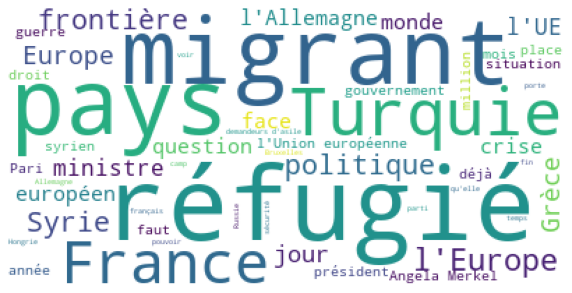

In [52]:
# Concatenate all texts into a single string
text = ' '.join(filtered_articles_syria['Texte'])

# Remove specified terms from the text

with open('stop_word_fr.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

specified_terms = ["n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [59]:
terms_mentioned_ukraine = [
    "Ukraine", "ukrainien", "ukrainienne", "Kiev"
]

filtered_articles_ukraine = df[df["Texte"].str.contains('|'.join(terms_mentioned_ukraine), case=False)]
filtered_articles_ukraine

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
24,Les Echos (site web),BHL : « Cette société française me fait peur »,2020-03-05,DANIEL FORTIN; NICOLAS BARRE,"Vous avez entrepris, depuis quelques semaines,...",vous rendre sur plusieurs théâtres de conflit...,es crimes de la bande à Baader. Jürgen Haberma...,Echos
46,Le Monde (site web),Josep Borrell : « C’est la désunion affichée p...,2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pie...",Josep Borrell est l’actuel ministre des affair...,étrangères de l’Espagne. Ce socialiste catalan...,ivisée en deux parties et le conflit identitai...,Monde
48,Les Echos (site web),Quotas d'immigration : l'Europe en ordre dispersé,2019-11-05,CLAUDE FOUQUET,Si les quotas d'immigration économique que le ...,vernement français veut favoriser ont depuis p...,"atre pays (Ukraine, Serbie, Mongolie et Philip...",Echos
63,"Libération, no. 11906",Principale Codes en stock Jean-Philippe Tous...,2019-09-14,Philippe Lançon,"«A la commission européenne où je travaille, o...",e croyait au Japon. Ma famille aussi me pensai...,"me un page turner, une couleur profonde, inéd...",Libération
71,"Le Figaro, no. 23341","Alain Keler, la mémoire dans la photo EXPOSIT...",2019-08-31,"Naulin, Michaël",Il est le premier surpris. Cheveux gris bouclé...,"un peu hirsutes, lunettes rondes, un appareil ...","r. Visa pour l'image, Perpignan (66), du 31 ...",Figaro
...,...,...,...,...,...,...,...,...
8705,Le Monde,Migrants mineurs à Ceuta : le gouvernement esp...,2020-06-17,NaN,Berlin correspondant - Asix seMaynes des élect...,"s législatives, le 26 september, la candidate ...",ecteurs qui décident. Mays oui : nous ne faiso...,Monde
8727,Le Figaro,"Migrants: à Calais, l’inlassable ballet noctur...",2020-04-10,NaN,L'Ukraine a annoncé jeudi avoir envoyé 38 tonn...,de barbelés en tant qu'« aide humanitaire » à ...,sa réélection en August 2020. Des milliers de ...,Figaro
8765,Le Figaro,"Brexit : cinq ans après, plus de 80 % des Brit...",2022-01-24,NaN,"Avocat et spécialiste du droit international, ...",ecteur pour l'Europe du cabinet de conseil géo...,"des épreuves : l'enfer nazi, le statut de réfu...",Figaro
8794,Le Figaro,"En Italie, malgré Draghi, la politique reprend...",2021-11-25,NaN,Correspondant à Washington Biden bat le rappel...,ses alliés. Le premier voyage d’un président ...,"aine. La troisième continuité, cette fois limi...",Figaro


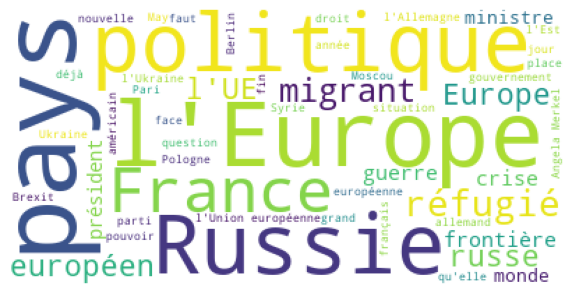

In [60]:
text = ' '.join(filtered_articles_ukraine['Texte'])

specified_terms = ["n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [57]:
terms_mentioned_afghanistan = [
    "Afghanistan", "afghan", "afghane"
]
filtered_articles_afghanistan = df[df["Texte"].str.contains('|'.join(terms_mentioned_afghanistan), case=False)]
filtered_articles_afghanistan

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
7,Le Monde,Télésommet sur Idlib entre les Européens et Er...,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jég...,Istanbul correspondante - Le coronavirus boule...,"se tout, mais les dirigeants européens ont enc...","mmentaires, en rappelant « l'offensive militai...",Monde
9,Le Monde (site web),Crise des migrants : « Ce qui se passe aujourd...,2020-03-14,Julia Pascual,"« Dans la nuit du 27 au 28 février, j’ai appri...",ue la Turquie n’allait plus empêcher l’arrivée...,re. J’espère que cela agira comme un coup de s...,Monde
11,"Le Figaro, no. 23505",EN BREF,2020-03-12,"Portes, Thierry",Collision entre un navire grec et un patrouill...,turc Les garde-côtes grecs ont déclaré qu'un ...,"en Afghanistan, ouvrant la voie à des pourparl...",Figaro
15,"Les Echos, no. 23154",Erdogan à Bruxelles pour démêler la crise des...,2020-03-09,CATHERINE CHATIGNOUX,"Samedi, Recep Tayyip Erdogan semblait jouer l'...",almie. « Sur ordre du président [...] aucun...,Union européenne. II a jusqu'ici refusé les 50...,Echos
20,Le Figaro (site web),«Vague migratoire: le seul moyen de faire recu...,2020-03-06,"Bonnamy, Jean-Loup",Renaud Girard est correspondant de guerre et c...,niqueur international du Figaro. FIGAROVOX.- P...,"» . Si nous l’avions fait, nous pourrions joue...",Figaro
...,...,...,...,...,...,...,...,...
8790,La Croix,Union européenne : Frontex jugée inefficace po...,2021-11-26,NaN,Athènes (Grèce) De notre correspondant « P...,l'instant on est libre d'aller et venir comme...,as question de se laisser surprendre comme en ...,Croix
8810,Le Monde,VIDÉO. Ceuta : une bénévole de la Croix Rouge ...,2021-11-17,NaN,Samos envoyée spéciale - C'est un miracle d'êt...,arrivée en vie jusqu'en Grèce ! » Au milieu de...,ouvais pas sortir prendre l'air et me demandai...,Monde
8872,Le Figaro,Connaissez-vous les petites histoires des fron...,2021-03-20,NaN,TERRORISME Franco Albrecht était un officier...,"lentueux de la Bundeswehr, promis à une affect...","rets, il se repend d'avoir, aux côtés d'authen...",Figaro
8895,Le Figaro,Migrants : Le campement historique démantelé,2020-07-27,NaN,"Sous l'effet de la crise sanitaire, les chiffr...",liés à l'immigration en France ont pour la pre...,"données de 2019, non renouvelées, 5 millions ...",Figaro


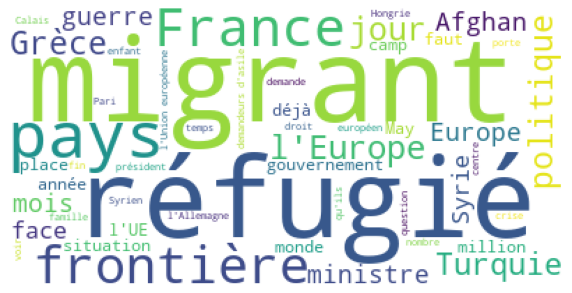

In [58]:
text = ' '.join(filtered_articles_afghanistan['Texte'])

specified_terms = ["n'a", "n'est", "crisemigratoire", "crisedes"]
for term in specified_terms:
    text = text.replace(term, '')

# Create a WordCloud object with stopwords
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=50).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()